2022-04-22 20:25:04,769 - qm - INFO - Performing health check
2022-04-22 20:25:04,773 - qm - INFO - Health check passed
25
2022-04-22 20:25:04,965 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2022-04-22 20:25:05,001 - qm - INFO - Flags: 
2022-04-22 20:25:05,003 - qm - INFO - Simulating program


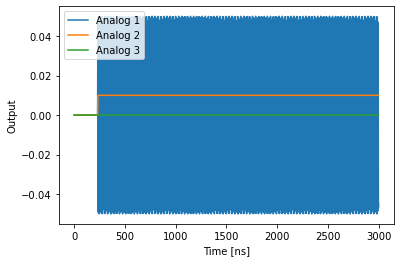

In [1]:
from config import config
from qm.qua import program,for_,stream_processing,declare,declare_stream,wait,measure,play,save,fixed,demod,amp,ramp, align
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm import SimulationConfig
import time as time
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np


qmm = QuantumMachinesManager(host='192.168.15.128',port=80)
qmm.close_all_quantum_machines()
qm = qmm.open_qm(config)

num_of_slices=100
slice_length=int(config['pulses']['readout_pulse_0_2']['length']/4/num_of_slices)
print(slice_length)


with program() as sprog:
    var=declare(fixed,value=np.linspace(-0.1,0.3,5))
    ind=declare(int)
    I=declare(fixed,size=num_of_slices)
    Q=declare(fixed,size=num_of_slices)
    with for_(ind,0,ind<5,ind+1):
        # align('Q1_readout','Q1_L')
        
        play('CW'*amp(0.1), 'Q1_L', duration=10000//4)
        measure('readout_pulse_0_05', 'Q2_readout', None, demod.sliced('cos', I ,slice_length, 'out1'), demod.sliced('sin', Q ,slice_length, 'out1'))
        # play('CW'*amp(-var[ind]), 'Q1_L', duration=100//4)
    


job = qm.simulate(sprog, SimulationConfig(int(3000//4)))
samples = job.get_simulated_samples()
samples.con1.plot()


# just testing the pulser part

In [5]:
def hold_action(channel,time,looped=False):
    return {'action':'hold' , 'channel':channel , 'action_variables':{'time':time},'looped':looped}

def step_action(channel,value,time,looped=False,looped_variable='step_value',loop_index=0):
    return {'action':'step' , 'channel':channel , 'action_variables':{'time':time,'step_value':value},'looped':looped,'looper':looped_variable,'loop_index':loop_index}

def ramp_action(channel,rate,time,looped=False):
    return {'action':'ramp' , 'channel':channel , 'action_variables':{'time':time,'rate':rate},'looped':looped}

def meas_action(channel,type='full',pulse='readout_pulse_0_05',looped=False,buffer_size=16,slices=100,analog_output='out1'):
    return {'action':'meas' , 'channel':channel , 'action_variables':{'type':type , 'pulse':pulse,'buffer_size':buffer_size,'slices':slices,'analog_output':analog_output},'looped':looped}


from qmachine.pulse_generator.config import config
from qmachine.pulse_generator.pulse_generator import Pulser
import numpy as np
pulse_maker=Pulser(config)
step_time=10000

actions_m1={'steps':{
                '1':
                    {'ch1':step_action(channel='ch1',value=np.linspace(0.1,0.3,4),time=step_time//4,looped=True,looped_variable='step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(-0.1,-0.3,4),step_time//4,True,'step_value',loop_index='1'),
                    'm1':meas_action('m1',type='sliced',slices=100,buffer_size=[100,4,4])},
                '2':
                    {'ch1':step_action('ch1',np.linspace(-0.1,-0.3,4),step_time//4,True,'step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(0.1,0.3,4),step_time//4,True,'step_value',loop_index='1')}},
        'looped':[4,4],
        'channels':['ch1','ch2','m1']}


actions_m2={'steps':{
                '1':
                    {'ch1':step_action('ch1',np.linspace(0.1,0.3,4),step_time//4,True,'step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(-0.1,-0.3,4),step_time//4,True,'step_value',loop_index='1')},
                '2':
                    {'ch1':step_action('ch1',np.linspace(-0.1,-0.3,4),step_time//4,True,'step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(0.1,0.3,4),step_time//4,True,'step_value',loop_index='1'),
                    'm1':meas_action('m1',buffer_size=[4,4])}},
        'looped':[4,4],
        'channels':['ch1','ch2','m1']}

# actions={'steps':{
#                 '1':
#                     {'ch1':step_action('ch1',0.1,1000//4,False,'step_value',loop_index='0')},
#                 '2':
#                     {'ch1':step_action('ch1',-0.1,1000//4,False,'step_value',loop_index='0')}},
#         'channels':['ch1']}


# import pprint
# pprint.pprint(actions)

seq,mod_actions=pulse_maker.build_seq(actions_m1)

job=pulse_maker.simulate_pulse(seq,320000//4+300//4)
# pulse_maker.open_qm(pulse_maker.config)
# job=pulse_maker.qm.execute(seq)

readout length: 10000ns
slice length=25
2022-04-22 20:26:25,594 - qm - INFO - Performing health check
2022-04-22 20:26:25,599 - qm - INFO - Health check passed
quantum machine opened with channels ['Q1_R', 'Q1_L', 'Q1_readout', 'Q2_readout']
default value for CW is: 0.1
2022-04-22 20:26:25,675 - qm - INFO - Flags: 
2022-04-22 20:26:25,676 - qm - INFO - Sending program to QOP
2022-04-22 20:26:25,743 - qm - ERROR - Unexpected error: Failed to compile job
2022-04-22 20:26:25,745 - qm - ERROR - Incompatible integration weight duration. Received: 2500 ns. Expected: 2500 ns (@ File "d:\qcodes_local\torbjorn\apg\qmachine\qmachine\pulse_generator\pulse_generator.py", line 156: self.meas_dict[variables['type']]('cos',variables['save_I'],variables['slice_length'],variables['analog_output']), )
2022-04-22 20:26:25,746 - qm - ERROR - Incompatible integration weight duration. Received: 2500 ns. Expected: 2500 ns (@ File "d:\qcodes_local\torbjorn\apg\qmachine\qmachine\pulse_generator\pulse_generator

FailedToAddJobToQueueException: 1650454743249

In [2]:
import pprint
pprint.pprint(mod_actions['steps']['1']['m1'])

{'action': 'meas',
 'action_variables': {'I_name': 'I_1',
                      'Q_name': 'Q_1',
                      'buffer_size': 16,
                      'pulse': 'readout_pulse_0_05',
                      'save_I': <qm.qua._dsl._Expression object at 0x0000018531559930>,
                      'save_I_stream': <qm.qua._dsl._ResultSource object at 0x0000018531559DB0>,
                      'save_Q': <qm.qua._dsl._Expression object at 0x0000018531559CC0>,
                      'save_Q_stream': <qm.qua._dsl._ResultSource object at 0x0000018531559E70>,
                      'type': 'full'},
 'channel': 'm1',
 'looped': False}


In [3]:
all_results= {key : item.fetch_all() for key,item in job.result_handles._all_results.items()}

In [9]:
all_results

{'I_1': array([[-4.44129109e-05,  5.35473228e-05, -3.15643847e-05,
          5.62518835e-07],
        [-5.13009727e-05, -4.79780138e-05,  1.23046339e-05,
          1.35041773e-05],
        [-1.17532909e-05,  6.90855086e-05, -3.35797668e-05,
          4.88273799e-05],
        [ 1.33365393e-06,  2.10516155e-05,  2.21356750e-05,
         -3.69548798e-06]]),
 'Q_1': array([[ 2.43149698e-05, -1.97142363e-05,  2.19568610e-05,
          2.96868384e-05],
        [-1.34482980e-05,  8.08872283e-05, -1.69165432e-05,
         -1.37239695e-05],
        [-4.39323485e-05, -1.82092190e-05,  1.79819763e-05,
          5.43892384e-07],
        [-4.40701842e-05,  1.52885914e-05, -4.50015068e-05,
         -1.16005540e-05]])}

In [4]:
t=job.result_handles.get('I_1')

In [6]:
t.fetch_all().shape

(4, 4)

In [1]:
36e3//6


6000.0